## Detector model: Kiukas et al. vs PW

In [95]:
from sympy import *
# from sympy.physics.matrices import mdft
# from sympy.physics.quantum import TensorProduct
from sympy.physics.quantum.dagger import Dagger
from sympy.plotting import plot
import numpy as np
import matplotlib.pyplot as plt

In [96]:
gamma = Symbol('gamma', real=True)
t = Symbol('t', real=True)
tprime = Symbol('t\'', real=True)

In [97]:
def D(_gamma):
    return Rational(1, 2) * Matrix([
        [0, 0],
        [0, _gamma]
    ])

In [98]:
H = Matrix ([
[0, 1] ,
[1, 0]
])

In [99]:
init_printing ()


In [100]:
H

⎡0  1⎤
⎢    ⎥
⎣1  0⎦

In [101]:
H.eigenvects()

⎡⎛       ⎡⎡-1⎤⎤⎞  ⎛      ⎡⎡1⎤⎤⎞⎤
⎢⎜-1, 1, ⎢⎢  ⎥⎥⎟, ⎜1, 1, ⎢⎢ ⎥⎥⎟⎥
⎣⎝       ⎣⎣1 ⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠⎦

It's manually seen that $\langle H \rangle = 0$ and $\langle H^2 \rangle = 1$, therefore $\sigma_{H} = 1$.

In [102]:
def K(_gamma):
    return H - I*D(_gamma)

In [103]:
K(gamma)

⎡0    1  ⎤
⎢        ⎥
⎢   -ⅈ⋅γ ⎥
⎢1  ─────⎥
⎣     2  ⎦

In [104]:
def B(_gamma):
    return lambda t: exp(-I*K(_gamma)*t)

In [105]:
def U():
    return lambda t: exp(-I*H*t)

In [106]:
def non_unitary_psi(_t):
    return B(2*sqrt(2))(_t) * Matrix([1,0])

In [107]:
def unitary_psi(_t):
    return U()(_t) * Matrix([1,0])

In [108]:
non_unitary_psi(t)

⎡          √2⋅t   √2⋅ⅈ⋅t             √2⋅t   √2⋅ⅈ⋅t⎤
⎢        - ──── - ──────           - ──── + ──────⎥
⎢           2       2                 2       2   ⎥
⎢√2⋅ⅈ⋅t⋅ℯ                  √2⋅ⅈ⋅t⋅ℯ               ⎥
⎢─────────────────────── - ───────────────────────⎥
⎢     ⎛√2⋅t   √2⋅ⅈ⋅t⎞           ⎛√2⋅t   √2⋅ⅈ⋅t⎞   ⎥
⎢   2⋅⎜──── + ──────⎟         2⋅⎜──── - ──────⎟   ⎥
⎢     ⎝ 2       2   ⎠           ⎝ 2       2   ⎠   ⎥
⎢                                                 ⎥
⎢          √2⋅t   √2⋅ⅈ⋅t         √2⋅t   √2⋅ⅈ⋅t    ⎥
⎢        - ──── - ──────       - ──── + ──────    ⎥
⎢           2       2             2       2       ⎥
⎢    √2⋅ℯ                  √2⋅ℯ                   ⎥
⎢    ─────────────────── - ───────────────────    ⎥
⎣             2                     2             ⎦

In [109]:
def lossy_norm(_t):
    psi = B(2*sqrt(2))(_t) * Matrix([1,0])
    return re(abs(psi[0])**2 + abs(psi[1])**2)

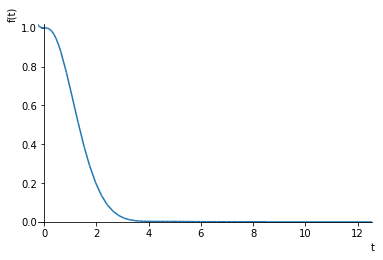

In [110]:
plot(lossy_norm(t),(t, -0.25, 4*pi))

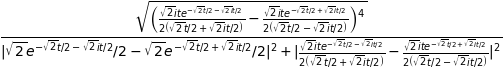

In [111]:
prob_0_detect(t)

In [112]:
def prob_0_detect(t):
    return abs(non_unitary_psi(t)[0]**2) / lossy_norm(t)

In [113]:
def prob_1_detect(t):
    return abs(non_unitary_psi(t)[1]**2) / lossy_norm(t)

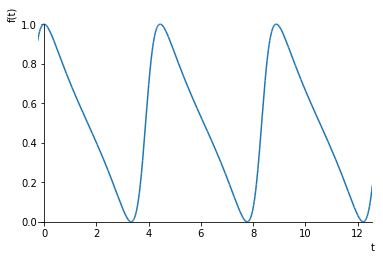

In [114]:
plot(prob_0_detect(t),(t, -0.25, 4*pi))

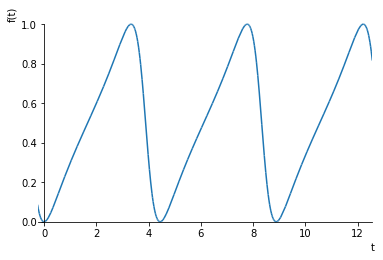

In [115]:
plot(prob_1_detect(t),(t, -0.25, 4*pi))

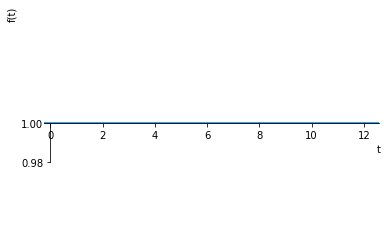

In [116]:
plot(prob_0_detect(t) + prob_1_detect(t),(t, -0.25, 4*pi))

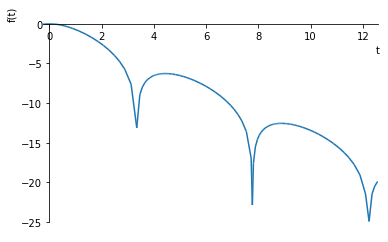

In [117]:
plot(log(abs(non_unitary_psi(t)[0]**2)), (t, -0.25, 4*pi))

In [118]:
def prob_0_unitary(t):
    return abs(unitary_psi(t)[0]**2)

In [119]:
def prob_1_unitary(t):
    return abs(unitary_psi(t)[1]**2)

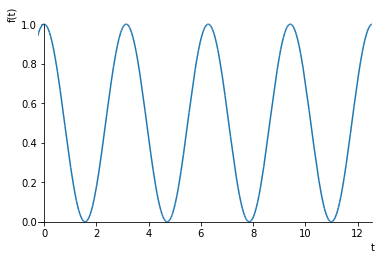

In [120]:
plot(prob_0_unitary(t),(t, -0.25, 4*pi))

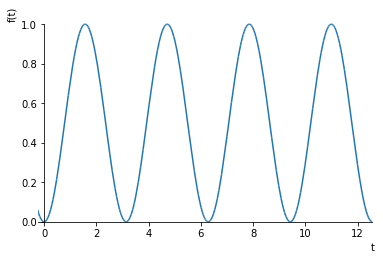

In [121]:
plot(prob_1_unitary(t),(t, -0.25, 4*pi))

In [122]:
lossy_norm_n = lambdify(t, lossy_norm(t), "numpy")

In [123]:
lossy_norm_n(2)

In [140]:
X = np.linspace(1e-6, 8*np.pi, 5000)  # avoid singularity in t=0

In [141]:
Y = lossy_norm_n(X)

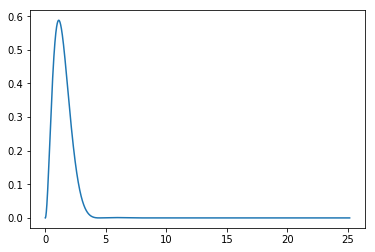

In [142]:
plt.plot(X, -np.gradient(Y, X))

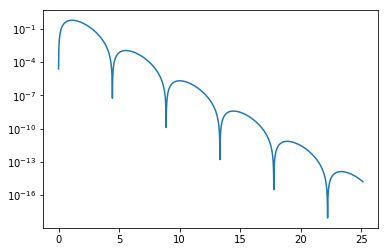

In [143]:
plt.semilogy(X, -np.gradient(Y, X))